In [1]:
#importing library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading data

In [2]:
data=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape #size of dataset

(891, 12)

In [5]:
data.isnull().sum() #checking entries with null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data.dtypes #types of data in the dataset

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
test_ids= test["PassengerId"]

In [9]:
test.shape

(418, 11)

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Data Cleaning

In [11]:
data = data.drop(["PassengerId","Name","Ticket","Cabin"], axis = 1)
#dropping the columns that doesnt seem to influence output

In [12]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [13]:
test = test.drop(["PassengerId","Name","Ticket","Cabin"], axis=1)

In [14]:
data['Age'].fillna(data['Age'].median(), inplace = True)#filling missing entries

In [15]:
test['Age'].fillna(test['Age'].median(), inplace = True) 

In [16]:
data['Embarked'].fillna("U", inplace = True)

In [17]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [18]:
#encoding the variables into readable format for calculation purposes
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()

cols = ["Sex","Embarked"]

for col in cols:
    data[col] = le.fit_transform(data[col])
    test[col] = le.transform(test[col])
    
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [19]:
data.describe() #finding statistical values of the dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,1.538721
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.794231
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [20]:
data.corr() #finding data correlation

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,-0.163517
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.157112
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,0.104057
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.014205
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,0.066654
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,0.038322
Fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,-0.221226
Embarked,-0.163517,0.157112,0.104057,-0.014205,0.066654,0.038322,-0.221226,1.000000


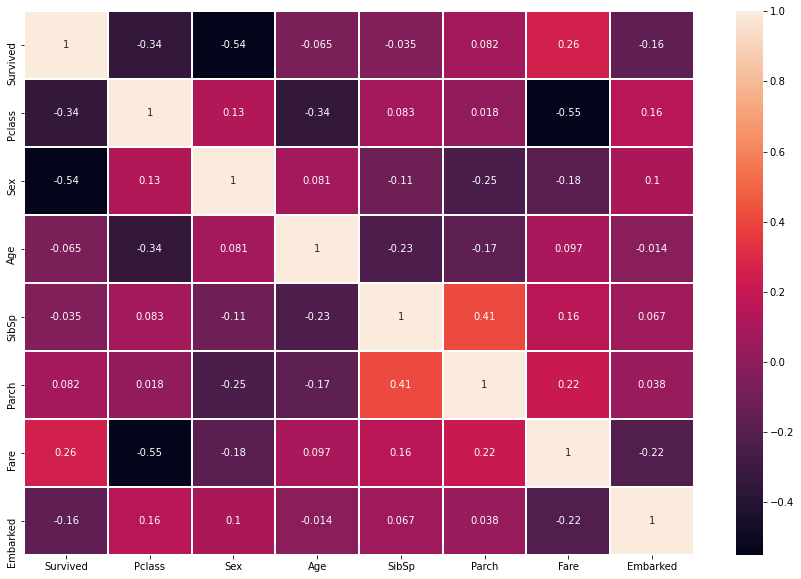

In [21]:
correlation_matrix=data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot = True, linewidths = 1)
plt.show() 

In [22]:
corr=data.corr()['Survived'].sort_values(ascending=False)
print(corr)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.064910
Embarked   -0.163517
Pclass     -0.338481
Sex        -0.543351
Name: Survived, dtype: float64


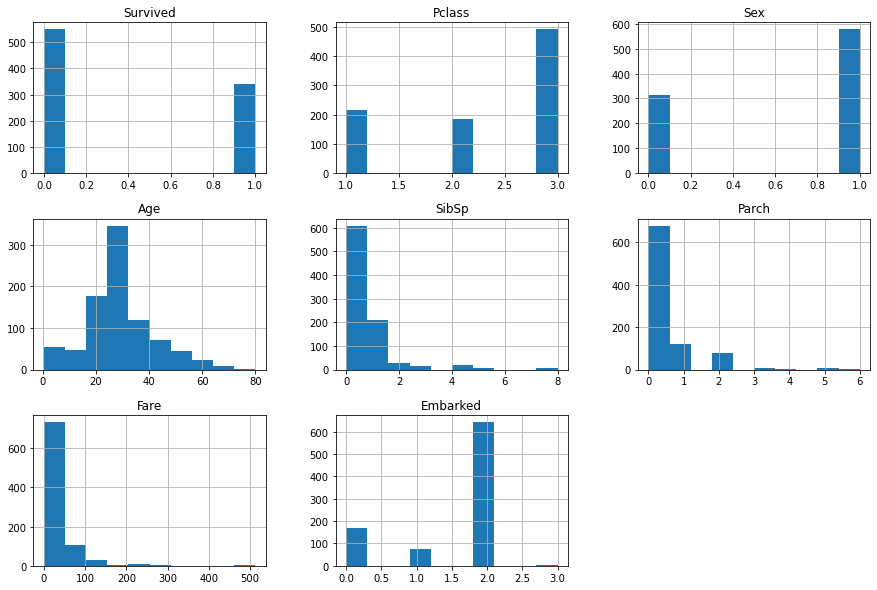

In [23]:
#Univariate analysis, to observe trend in variations in the dataset:
data.hist(figsize=(15,10));

# Machine learning

Splitting dataset into train set and test set

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y = data['Survived']
X = data.drop(['Survived'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print('Shape of X and y respectively (train) :', X_train.shape, y_train.shape)
print('Shape of X and y respectively (test) :', X_test.shape, y_test.shape)

Shape of X and y respectively (train) : (712, 7) (712,)
Shape of X and y respectively (test) : (179, 7) (179,)


# Logistic Regression Method

In [25]:
from sklearn.linear_model import LogisticRegression
CLF = LogisticRegression()
CLF.fit(X_train,y_train)
CLF_prediction=CLF.predict(X_test)
CLF_trainaccuracy = CLF.score(X_train,y_train)
CLF_testaccuracy = CLF.score(X_test,y_test)
print("Accuracy of Logistic regression on trained dataset is ",CLF_trainaccuracy) 
print("Accuracy of Logistic regression on test dataset is ",CLF_testaccuracy)

Accuracy of Logistic regression on trained dataset is  0.7949438202247191
Accuracy of Logistic regression on test dataset is  0.7988826815642458


# Decision Tree Classifier method

In [26]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(X_train,y_train)
DTC_prediction=DTC.predict(X_test)
DTC_trainaccuracy = DTC.score(X_train,y_train)
DTC_testaccuracy = DTC.score(X_test,y_test)
print("Accuracy of Decision Tree Classifier on trained dataset is ",DTC_trainaccuracy) 
print("Accuracy of Decision Tree Classifier on test dataset is ",DTC_testaccuracy)

Accuracy of Decision Tree Classifier on trained dataset is  0.9817415730337079
Accuracy of Decision Tree Classifier on test dataset is  0.776536312849162


# Random Forest Classifier method

In [27]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
RF_prediction=RF.predict(X_test)
RF_trainaccuracy = RF.score(X_train,y_train)
RF_testaccuracy = RF.score(X_test,y_test)
print("Accuracy of Random Forest Classifier on trained dataset is ",RF_trainaccuracy) 
print("Accuracy of Random Forest Classifier on test dataset is ",RF_testaccuracy)

Accuracy of Random Forest Classifier on trained dataset is  0.9817415730337079
Accuracy of Random Forest Classifier on test dataset is  0.8435754189944135


In [28]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [29]:
test['Fare'].fillna(0, inplace = True)

In [30]:
#Using the Random Forest Classifier Prediction for the result,
submission_preds = RF.predict(test)

In [33]:
submission = pd.read_csv("gender_submission.csv")

In [34]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [35]:
df = pd.DataFrame({"PassengerId":test_ids.values,"Survived":submission_preds})
df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [36]:
#exporting final survival prediction,
df.to_csv("Submissions.csv", index = False)